### 第一题：简单线性回归

#### 题目
有20名学生，研究学生在考前复习时间与得到的成绩之间的相关关系。



```
from collections import OrderedDict
import pandas as pd
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,
                2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  
                48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
examOrderDict=OrderedDict(examDict)
exam=pd.DataFrame(examOrderDict)
>>> exam.head()

   学习时间  分数
0  0.50  10
1  0.75  22
2  1.00  13
3  1.25  43
4  1.50  20
```

+ 问题一：此数据适不适合用线性回归的模型？为什么？
+ 问题二：划分训练集与测试集
+ 问题三：模型的简单线性回归方程
+ 问题四：评估模型精度。

#### 解答

1. 问题一

    该数据比较适用线性回归的模型。

    首先，解释变量（学习时间）和响应变量（分数）都为连续取值的变量，应当使用回归的方法。

    其次如下所示画出数据分布图，数据分布并未呈现明显的非线性特征，因此可以使用线性回归。

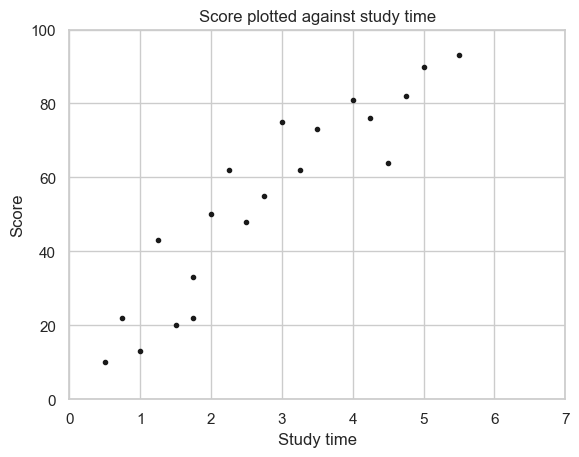

In [554]:
from collections import OrderedDict
# import pandas as pd
import matplotlib.pyplot as plt
examDict={
    '学习时间':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
    '分数':    [10,  22,  13,  43,  20,  22,  33,  50,  62,  48,  55,  75,  62,  73,  81,  76,  64,  82,  90,  93]
}
# examOrderDict=OrderedDict(examDict)
# exam=pd.DataFrame(examOrderDict)
# print(exam)

plt.figure()
plt.title("Score plotted against study time")
plt.xlabel('Study time')
plt.ylabel('Score')
plt.plot(examDict["学习时间"],examDict["分数"],'k.')
plt.axis([0,7,0,100])
plt.grid(True)
plt.show()


2. 问题二
    
    划分训练集与测试集

In [555]:
train_set={"time":examDict["学习时间"][::2],"score":examDict["分数"][::2]}
test_set={"time":examDict["学习时间"][1::2],"score":examDict["分数"][1::2]}
#print(train_set)
#print(test_set)

3. 问题三

    模型的简单线性回归方程

In [556]:
# 先求解释变量的方差
import numpy as np
X=np.array(train_set["time"])
x_bar=X.mean()
x_var=np.var(X,ddof=1) 
    #考虑贝塞尔校正的numpy方差函数，等效于x_var=((X-x_bar)**2).sum()/(X.shape[0]-1)


# 再求解释变量和响应变量的协方差
Y=np.array(train_set["score"])
y_bar=Y.mean()
cov_xy=np.cov(X,Y)[0][1]
    #从协方差矩阵得到协方差，等效于cov=np.multiply(X - x_bar, Y - y_bar).sum()/(X.shape[0] - 1)


# 求直线斜率beta
beta=cov_xy/x_var
# 求直线截距alpha
alpha=y_bar-beta*x_bar
# 输出
print(f"简单线性回归方程:y={beta}x+{alpha}")


#################################################
#直接使用sklearn库可以快速得到beta和alpha
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X.reshape(-1,1),Y)#训练模型
print("\n使用sklearn库得到的斜率和截距如下")
print(f"beta={model.coef_},alpha={model.intercept_}")

简单线性回归方程:y=17.400722021660652x+2.8880866425992764

使用sklearn库得到的斜率和截距如下
beta=[17.40072202],alpha=2.8880866425992764


4. 问题四
    评估模型精度，使用R方评估

In [557]:
# 先求出预测值：
score_predict=beta*np.array(test_set["time"])+alpha
score_true=np.array(test_set["score"])
ss_res=((score_true-score_predict)**2).sum()
ss_tot=score_true.var()*(score_true.shape[0])
r_squared=1-ss_res/ss_tot
print(f"r_squared={r_squared}")

#################################################
#直接使用sklearn库可以快速得到R方值
print("\n使用sklearn库得到的R方值如下")
print(model.score(np.array(test_set["time"]).reshape(-1,1),np.array(test_set["score"])))


r_squared=0.7895629119156425

使用sklearn库得到的R方值如下
0.7895629119156425


$𝑅^2$ 计算得分为0.7895629119156425，这表明在本例中，线性回归模型有不错的拟合效果

### 第二题：多元线性回归

#### 题目
线性回归预测糖尿病

##### 糖尿病数据集


Sklearn 机器学习包提供了糖尿病数据集（Diabetes Dataset），该数据集主要包括442 行数据，10 个特征值，分别是：年龄（Age）、性别（Sex）、体质指数（Body mass index）、平均血压（Average Blood Pressure）、S1 S6 一年后疾病级数指标。预测指标为Target，它表示一年后患疾病的定量指标。

```
from sklearn import datasets
diabetes = datasets.load_diabetes()
print(diabetes.data)
print(diabetes.target)
```
调用load_diabetes() 函数载入糖尿病数据集，然后输出其数据data 和类标target。输出总行数442 行，特征数共10 个，类型为（442L, 10L）。

##### 代码实现


现在我们将糖尿病数据集划分为训练集和测试集，整个数据集共442 行，我们取前422 行数据用来线性回归模型训练，后20 行数据用来预测。其中取预测数据的代码为```diabetes_x_temp[-20:]```，表示从后20 行开始取值，直到数组结束，共取值20 个数。整个数据集共10 个特征值，为了方便可视化画图我们只获取其中一个特征进行实验，这也可以绘制图形，而真实分析中，通常经过降维处理再绘制图形。这里获取第3 个特征，对应代码为：```diabetes_x_temp = diabetes.data[:, np.newaxis, 2]```


##### 代码优化

对代码进行优化。可视化绘图增加了散点到线性方程的距离线，增加了保存图片设置像素代码等。



#### 解答

普通线性回归的R方=0.585085427447195


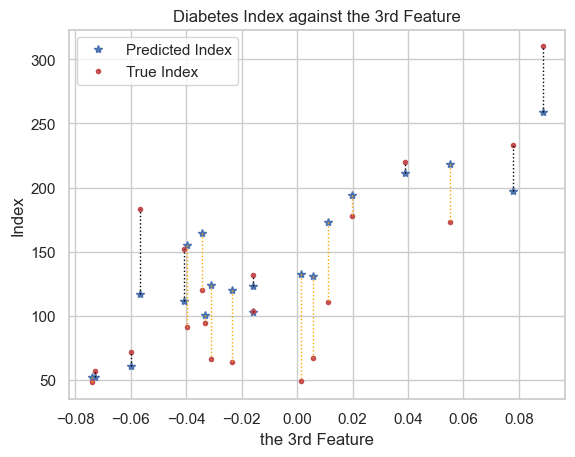

In [558]:
from sklearn.linear_model import LinearRegression
from sklearn import datasets
import matplotlib.pyplot as plt
diabetes = datasets.load_diabetes()
#print(diabetes.data)
#print(diabetes.target)

test_x=diabetes.data[-20:,:]
train_x=diabetes.data[:422,:]
test_y=diabetes.target[-20:]
train_y=diabetes.target[:422]
model=LinearRegression() #使用普通的线性回归
model.fit(train_x,train_y) #训练模型
predict_y=model.predict(test_x) #生成预测值

test_x_3 = test_x[:,np.newaxis,2]# 取第3个特征
plt.figure()
plt.title("Diabetes Index against the 3rd Feature")
plt.xlabel('the 3rd Feature')
plt.ylabel('Index')
p_predict,=plt.plot(test_x_3,predict_y,'*b')
p_test,=plt.plot(test_x_3,test_y,'.r') # 此处要加逗号！
plt.legend([p_predict,p_test],["Predicted Index","True Index"],loc="upper left")
for i in range(0,len(test_x)):
    plt.plot([test_x_3[i],test_x_3[i]],[predict_y[i],test_y[i]],":",color="orange" if predict_y[i]>test_y[i]else"black",linewidth=1)

print(f"普通线性回归的R方={model.score(test_x,test_y)}")



### 第三题：局部加权线性回归

#### 题目
预测鲍鱼的年龄



+ 数据集介绍

    鲍鱼数据集可以从UCI中获得。此数据集数据以逗号分隔，没有列头。每个列的名字存在另外一个文件中。建立预测模型所需的数据包括性别、长度、直径、高度、整体重量、去壳后重量、脏器重量、壳的重量、环数。最后一列“环数”是十分耗时采获得的，需要锯开壳，然后在显微镜下观察得到。这是一个有监督机器学习方法通常需要的准备工作。基于一个已知答案的数据集构建预测模型，然后用这个预测模型预测不知道答案的数据。鲍鱼年龄可以从鲍鱼壳的层数推算得到。

要求：

+ 从浙大云盘下载数据并编写读数据的程序；
+ 建立线性模型预测鲍鱼的年龄；
+ 利用局部加权线性回归预测鲍鱼的年龄；
+ 可视化预测结果；
+ 评估不同模型（利用前100 个数据训练，100-200 数据用于测试）。

#### 解答

1. 读取数据并使用普通的线性回归（最小二乘法）预测鲍鱼的年龄

In [559]:
from pandas import read_table
DataFrame=read_table('hw2-abalone.txt',header=None,names=['Gender','Length','diameter','height','gross_weight','net_weight','inner_weight','shell_weight','rings'])
data=np.array(DataFrame)
features=data[:,0:8]
rings=data[:,-1]

train_x=features[:100,:]
train_y=rings[:100]
test_x=features[100:200,:]
test_y=rings[100:200]

#使用简单线性回归
olr_model=LinearRegression()
olr_model.fit(train_x,train_y) #训练模型
olr_predict_y=olr_model.predict(test_x) #生成预测值
print(f"\n\n线性回归的R方值：{olr_model.score(test_x,test_y)}")
print("相关系数矩阵为：")
print(np.corrcoef(olr_predict_y.T,test_y))



线性回归的R方值：0.5282058423842003
相关系数矩阵为：
[[1.         0.82470627]
 [0.82470627 1.        ]]


2. 使用局部加权线性回归预测鲍鱼的年龄

In [560]:

def lwlr(testPoint, xArr, yArr, k=1.0):
    """
    Parameters:
    testPoint - 测试样本点
    xArr - x数据集
    yArr - y数据集
    k - 高斯核的k,自定义参数
    Returns:
    ws - 回归系数
    """
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    m = np.shape(xMat)[0]
    weights = np.mat(np.eye((m))) # 创建权重对角矩阵
    for j in range(m): # 遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = np.exp(diffMat*diffMat.T/ (-2.0 * k ** 2))
        xTx = xMat.T * (weights * xMat)
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat)) # 计算回归系数
    #print(ws.shape)
    #print(testPoint.shape)
    #temp=np.array(testPoint*ws)
    #print(temp.shape)
    return np.array(testPoint * ws)

# 局部加权线性回归测试
def lwlrTest(testArr, xArr, yArr, k=1.0):
    """
    Parameters:
    testArr - 测试数据集
    xArr - x数据集
    yArr - y数据集
    k - 高斯核的k,自定义参数
    Returns:
    ws - 回归系数
    """
    m = np.shape(testArr)[0] # 计算测试数据集大小
    yHat = np.zeros(m)
    for i in range(m): # 对每个样本点进行预测
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

k=2.0
predict_y=lwlrTest(test_x,train_x,train_y,k)
ss_res=((test_y-predict_y)**2).sum()
ss_tot=test_y.var()*(test_y.shape[0])
r_squared=1-ss_res/ss_tot
print(f"\n\n当k取{k}时局部加权线性回归的R方值：{r_squared}")
print("相关系数矩阵为：")
print(np.corrcoef(predict_y.T,test_y))

C:\Users\18263\AppData\Local\Temp\ipykernel_5320\3004512914.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diffMat*diffMat.T/ (-2.0 * k ** 2))
C:\Users\18263\AppData\Local\Temp\ipykernel_5320\3004512914.py:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yHat[i] = lwlr(testArr[i], xArr, yArr, k)




当k取2.0时局部加权线性回归的R方值：0.6054073828945193
相关系数矩阵为：
[[1.         0.83835757]
 [0.83835757 1.        ]]


### 第四题：逻辑回归

#### 题目：
通过Logistic Regression 预测Titanic 乘客是否能在事故中生还。

从学在浙大上下载数据。

+ 导入工具库和数据
+ 查看缺失数据
    + 年龄
    + 仓位
    + 登船地点

+ 对数据进行调整

    对缺失的数据如何处理？年龄，仓位，登录地点？

+ 额外的变量

    其他数据如何处理

+ 数据分析

    性别分别、仓位分布、哪个地点登陆的乘客容易生还

+ Logistic Regression

    如何建立模型？如何评估？

#### 解答


##### 导入工具库和数据


In [561]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #设置seaborn画图的背景为白色
sns.set(style="whitegrid", color_codes=True)
# 将数据读入DataFrame
df = pd.read_csv("./hw2-titanic_data.csv")
# 预览数据
df.head()
print('数据集包含的数据个数{}.'.format(df.shape[0]))

数据集包含的数据个数1310.


##### 查看缺失的数据

+ 年龄

"age"特征缺失的百分比为20.15%

年龄分布图如下所示：


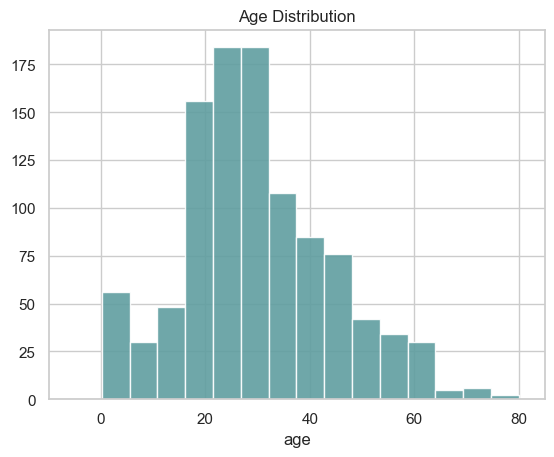

In [562]:
print('"age"特征缺失的百分比为%.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))

print("\n年龄分布图如下所示：")
ax = df["age"].hist(bins=15, color='cadetblue', alpha=0.9)
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.title("Age Distribution")
plt.show()

可以看到年龄有20.15%缺失，缺失率不高，且年龄特征作为重要的影响因素，可以考虑补充20.15%的年龄数据。

数据缺失的情况下，插补的方法有如下选择：

+ 均值一般适用于近似正态分布数据，观测值较为均匀散布均值周围；
+ 中位数一般适用于偏态分布或者有离群点数据，中位数是更好地代表数据中心趋势；
+ 众数一般用于类别变量，无大小、先后顺序之分。

根据年龄分布图，可见使用中位数填补缺失数据，更适合本例。

+ 仓位

In [563]:
# 仓位缺失的百分比
print('"Cabin" 特征缺失的百分比为%.2f%%' %((df['cabin'].isnull().sum()/df.shape[0])*100))

"Cabin" 特征缺失的百分比为77.48%


缺失的比例很大，达77.48%，因此丢弃此特征

+ 登船地点

"Embarked" 缺失的百分比0.23%
登船地点统计图如下：


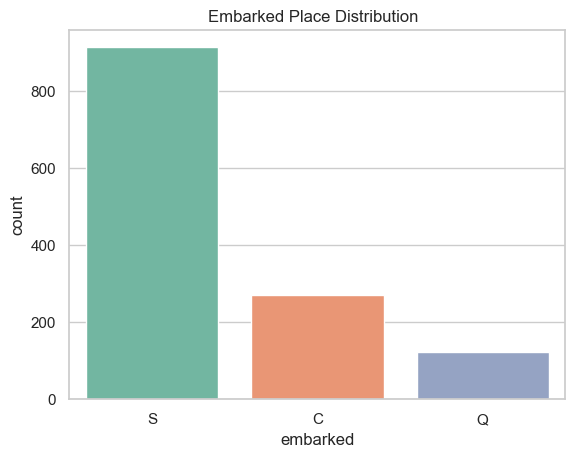

In [564]:
# 登船地点的缺失率
print('"Embarked" 缺失的百分比%.2f%%' %((df['embarked'].isnull().sum()/df.shape[0])*100))

print("登船地点统计图如下：")
sns.countplot(x='embarked', data=df, palette='Set2')
plt.title("Embarked Place Distribution  ")
plt.show()

缺失的比例很小，且“登船地点”特征的取值是离散取值，故选择使用众数（Southampton）进行填补。

Southampton登船的乘客显著多于其它地点，用它填充少量缺失数据显然不会引起太大的偏差。

##### 对数据进行调整

使用sklearn自带的数据填补函数：

In [565]:
#用中位数对年龄填补
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer() #实例化
imp_median = SimpleImputer(strategy="median") #用中位数填补
temp=np.array(df["age"][:].to_list())
#print(temp)
temp = imp_median.fit_transform(temp.reshape(-1,1))
df["age"]=temp
print('"age"特征缺失的百分比为%.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))

#用众数对登船地点进行填补
imp_most = SimpleImputer() #实例化
imp_most = SimpleImputer(strategy = "most_frequent")
temp=np.array(df["embarked"][:].to_list(),dtype=object)
temp=imp_most.fit_transform(temp.reshape(-1,1))
df["embarked"]=temp
print('"embarked"特征缺失的百分比为%.2f%%' %((df['embarked'].isnull().sum()/df.shape[0])*100))

#删除仓位数据
df=df.drop(['cabin'],axis=1)
df.head()

"age"特征缺失的百分比为0.00%
"embarked"特征缺失的百分比为0.00%


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,S


##### 额外的变量

先查看其它变量的数据缺失情况

In [566]:
print(df.isnull().sum())

pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    0
dtype: int64


可见剩余变量缺失数量都非常少，因此缺失数据选择直接丢弃。

另外要做的数据处理:

+ 姓名（name）和船票编号（ticket）

    与是否存活无关，删去

+ 性别（sex）, 登船地点(embarked), 舱位(pclass),

    多分类变量，应转化为哑变量。

    一般的，n个分类需要设置n-1个哑变量，因此还要删除多余的哑变量。
 

In [567]:
# 姓名和船票编号应该对结果没有影响，这两个特征直接删除
df = df.drop(["name","ticket"], axis=1)

# 数据缺失的话，直接删除该样本
df = df.dropna(axis=0,how='any')

df.isnull().sum()

# 把类别型变量转换为哑变量
a = pd.get_dummies(df['sex'], prefix = "sex")
b = pd.get_dummies(df['embarked'], prefix = "embarked")
c = pd.get_dummies(df['pclass'], prefix = "pclass")
# 把哑变量添加进dataframe
temp = [df,a,b,c]
df = pd.concat(temp, axis=1)
#df = df.drop(["sex","embarked","pclass"], axis=1)
df.head() # 显示新的dataframe


,pclass,survived,sex,age,sibsp,parch,fare,embarked,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,pclass_1.0,pclass_2.0,pclass_3.0
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S,1,0,0,0,1,1,0,0
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S,0,1,0,0,1,1,0,0
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S,1,0,0,0,1,1,0,0
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S,0,1,0,0,1,1,0,0
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S,1,0,0,0,1,1,0,0


##### 数据分析

+ 年龄分布与是否生还的关系

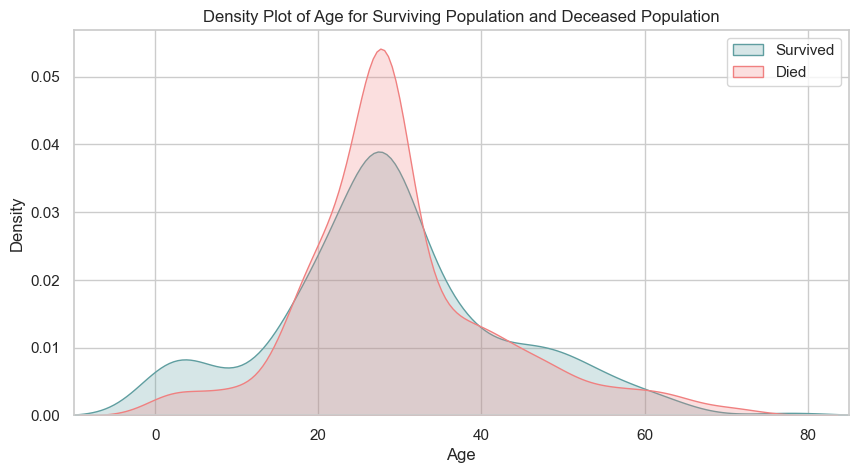

In [568]:
plt.figure(figsize=(10,5))
ax = sns.kdeplot(df["age"][df.survived == 1], color="cadetblue", fill=True)
sns.kdeplot(df["age"][df.survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

可见青年在遇难者中的比例大于在生还者中的比例，而儿童在遇难者中的比例小于在生还者中的比例。

+ 仓位分布与是否生还的关系


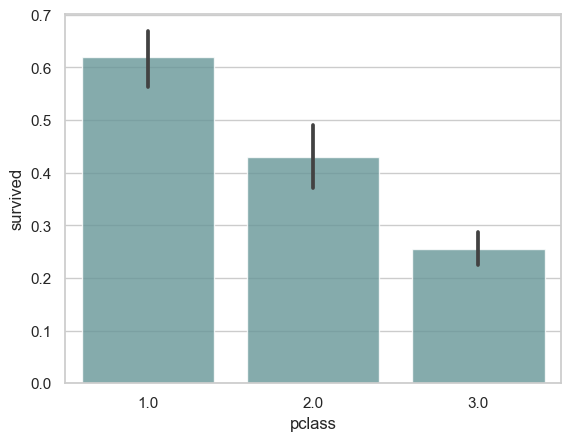

In [569]:
sns.barplot(x='pclass',y='survived',data=df,color="cadetblue",alpha=0.8)
plt.show()

可见一等舱的生还比例大于二等舱，二等舱又大于三等舱

+ 登船地点与生还比例的关系

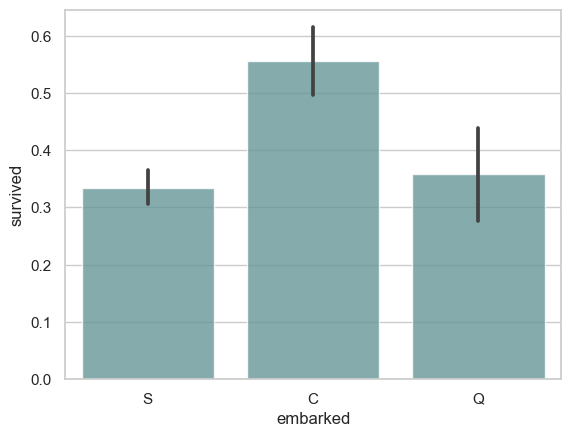

In [570]:
sns.barplot(x='embarked',y='survived',data=df,color="cadetblue",alpha=0.8)
plt.show()


可见从法国瑟堡Cherbourge登船的乘客生还率更高。

##### 逻辑回归

+ 模型建立

In [571]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 把类别变量删除只留下哑变量
df = df.drop(["sex","embarked","pclass"], axis=1)

# 创建X（特征）和y（类别标签）
# 注意n个变量只取n-1个哑变量即可
X = df[["age", "fare","sibsp","parch","embarked_C","embarked_Q", "sex_male", "pclass_1.0","pclass_2.0"]]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)



+ 模型评估

In [572]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print("准确率为%2.3f" % accuracy_score(y_test, y_pred))

准确率为0.817
